In [2]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('data/covid-19_world.csv',sep=',')
df = df[ df["countriesAndTerritories"]=="France" ]
df.sort_values("dateRep")
for col_to_drop in ["day","month","year","countriesAndTerritories","geoId",
                    "countryterritoryCode","popData2018","continentExp"]:

    df=df.drop(col_to_drop,1)

df['dateRep'] = pd.to_datetime(df['dateRep'],format="%d/%m/%Y")
df = df.sort_values("dateRep")
df = df[ df["dateRep"] > "2020-01-24"]
df["cases"] = df["cases"].cumsum()
df["deaths"] = df["deaths"].cumsum()
df

,dateRep,cases,deaths
5624,2020-01-25,3,0
5623,2020-01-26,3,0
5622,2020-01-27,3,0
5621,2020-01-28,3,0
5620,2020-01-29,4,0
5619,2020-01-30,5,0
5618,2020-01-31,6,0
5617,2020-02-01,6,0
5616,2020-02-02,6,0
5615,2020-02-03,6,0


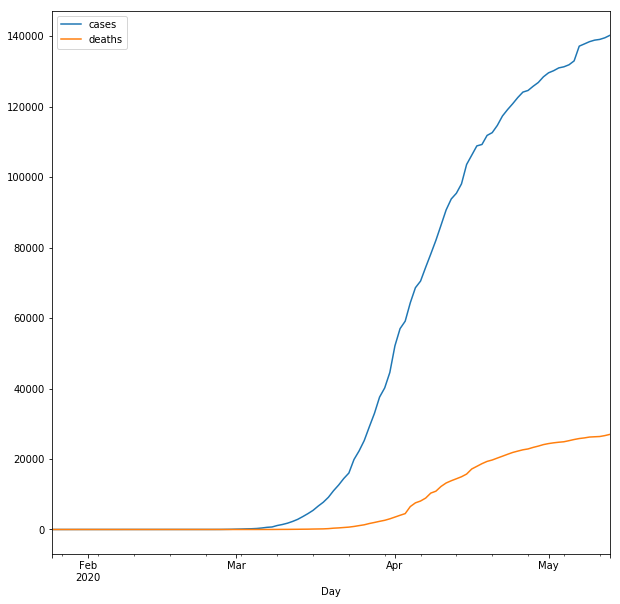

In [40]:
ax=df.plot(x="dateRep",y="cases",figsize=(10,10))
ax=df.plot(x="dateRep",y="deaths",ax=ax)
plt.xlabel('Day')
plt.show()

In [83]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [99]:
N = 1e6
beta = 1.0  # infected person infects 1 other person per day
D = 10.0 # infections lasts ten days
gamma = 1.0 / D

S0, I0, R0 = N-1, 1, beta/gamma

In [100]:
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T


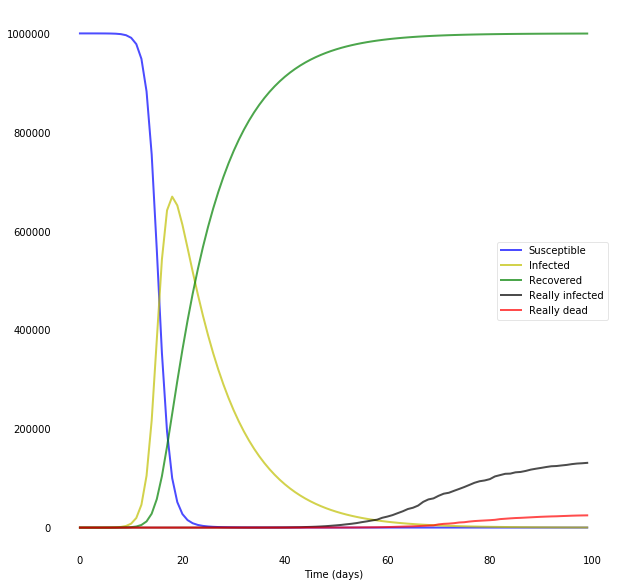

In [102]:
def plotsir(t, S, I, R,df):
    f, ax = plt.subplots(1,1,figsize=(10,10))
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
    ax.plot(t,df["cases"].to_numpy()[:-10],'k', alpha=0.7, lw=2, label='Really infected')
    ax.plot(t,df["deaths"].to_numpy()[:-10], 'r', alpha=0.7, lw=2, label='Really dead')
    ax.set_xlabel('Time (days)')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
    plt.show()
    
plotsir(t, S, I, R,df)